In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the datasets
df = pd.read_csv("Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
#split the dataset into dependent and independent variable
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [7]:
y = y.reshape(len(y) ,1)

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
#Traing the model
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\Xaid\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [10]:
# Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

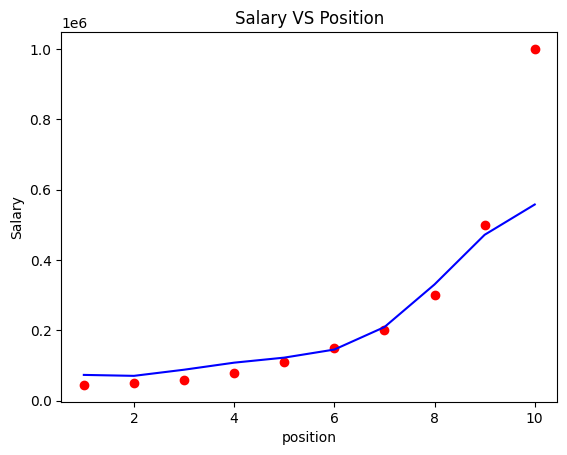

In [11]:
# Visulize the result
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title("Salary VS Position")
plt.xlabel('position')
plt.ylabel('Salary')
plt.show()


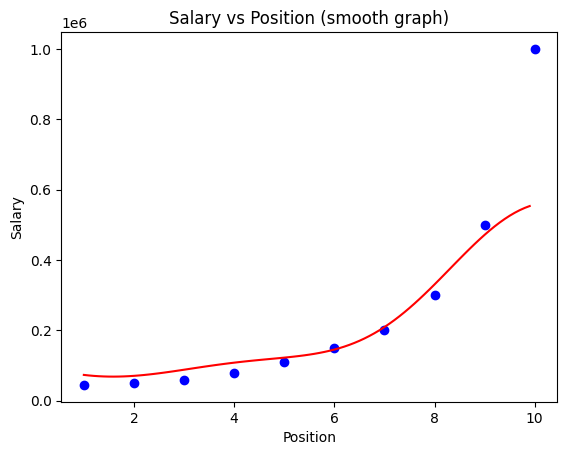

In [12]:
# Visualize result with more smoothness
x_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='blue')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)),color = 'red')
plt.title('Salary vs Position (smooth graph)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()